# Metodos numericos - Unidad 2

In [15]:
%matplotlib inline

## Método Gráfico

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def graficar(f, x_i, x_f, num=1000):
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, f(x), label='f(x)')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gráfico de f(x)')
    plt.grid(True)
    plt.show()




## Método de bisección

In [17]:
def biseccion(f, a, b, tol=10**-4, n=50):
    
    if f(a)*f(b) >= 0:  # El intervalo escogido no sirve,PREGUNTAR: ¿Será necesario hacer esto? no está en el algoritmo
        print('El intervalo no funciona, f(a)={:.2f} y f(b)={:.2f}'.format(f(a), f(b)))
        return None
    
    i = 1
    while i <= n and abs(f(p)) > tol:
        c = (a + b) / 2  # Punto medio
        e_abs = abs(b - a)  # Error absoluto
        print('ite {:<2}: a_{:<2}={:.7f}, b_{:<2}={:.7f}, c_{:<2}={:.7f}, e_abs={:.7f}'.format(i, i - 1, a, i - 1, b, i, c, e_abs))
        
        if f(c) == 0:  # Solución exacta encontrada
            print('Solución encontrada x={:.7f}'.format(c))
            return c
        
        if f(a) * f(c) < 0:  # Escog intervalo izquierdo
            b = c
        else:  # Escogr intervalo derecho
            a = c
        
        if e_abs < tol:  # Criterio de parada
            print('Solución encontrada x={:.7f}, iteraciones: {}'.format(c, i))
            return c
        
        i += 1
    
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i - 1))
    return None


## Método de Regula Falsi

In [18]:
def regulafalsi(f, a, b, tol=10**-4, n=50):
    
    if f(a)*f(b) >= 0:  # el intevalo escogido no sirve
        print('El intervalo no funciona, f(a)={:.2f} y f(b)={:.2f}'.format(f(a),f(b)))
        return None
    
    e_abs = abs(b-a)#PREGUNTA: EL ERROR DEBERIA SER AB(B-A) O ABS(F(X))?
    i = 1
    c = b - (f(b)*(b - a))/(f(b) - f(a))
    while i <= n and e_abs > tol:
        c_1 = c
        print('ite {:<2}: a_{:<2}={:.7f} , b_{:<2}={:.7f}, c_{:<2}={:.7f}'.format(i,i-1,a,i-1,b,i,c_1))
        
        if f(c_1)==0:  # ES L solución 
            print('Solución encontada x={:.7f}'. format(c_1))
            return c_1
        
        if f(a)*f(c)<0:  # escoger intervalo izquierdo
            b = c_1
        else:  # escoger intervalo derecho
            a = c_1
            
        c = b - (f(b)*(b - a))/(f(b) - f(a))
        
        e_abs = abs(c_1 - c)  # error absoluto // 
        
        if e_abs < tol:  # criterio de parada
            print('Solución encontrada x= {:.7f}, iteraciones: {}'. format(c,i))
            return c
        
        i += 1
    print ('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

## Método de la Secante

In [19]:
def secante(f, p_0, p_1, tol=10**-4, n=50):
    e_abs = abs(p_1 - p_0)
    
    print('ite {:<2}: p_{:<2}={:.7f}'.format(0,0,p_0))
    print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(1,1,p_1,e_abs))
    
    i = 2
    while i <= n:
        if f(p_1) == f(p_0): #división por cero, la fn es constante entre los puntos iniciales
            print('Solución no encontrada (error en los valores iniciales)')
            return None
        
        p_2 = p_1 - (f(p_1)*(p_1 - p_0))/(f(p_1) - f(p_0))  # fórmula método secante
        e_abs = abs(p_2 - p_1)
        print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(i,i,p_2,e_abs))
        
        if e_abs < tol:  # criterio de parada
            print('Solución encontrada x= {:.7f}, iteraciones: {}'. format(p_2,i))
            return p_2
        p_0 = p_1
        p_1 = p_2
        i += 1
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

# Método de Newton - Raphson

In [20]:
def newton_raphson(f, df, p_0, tol=10**-4, n=50):
    
    print('ite {:<2}: p_{:<2}={:.7f}'.format(0,0,p_0))
    e_abs = 1
    i = 1
    while i <= n:
        
        if df(p_0) == 0:  
            print('Solución no encontrara - df(x)=0')
            return None
        
        p_1 = p_0 - (f(p_0))/(df(p_0))  
        e_abs = abs(p_1-p_0)
        print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(i,i,p_1,e_abs))
        
        if e_abs < tol: 
            print('Solución encotrada x={:.7f}, iteraciones: {}'.format(p_1,i))
            return p_1
        
        p_0 = p_1
        i += 1
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

# Método punto fijo

In [21]:
def metodo_puntofijo(g, p_0, tol=10**-4, n=50):
   
    print('ite {:<2}: p_{:<2}={:.7f}'.format(0,0,p_0))
    i = 1
    while i <= n:
        try:
            p_1 = g(p_0)  
        except OverflowError:
            print('Explota todoooo !!!')
            return None
        e_abs = abs(p_1 - p_0)  
        print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(i,i,p_1,e_abs))
        if e_abs < tol:  
            print('Solución encontrada x={:.7f}, iteraciones: {}'.format(p_1,i))
            return p_1
        i += 1
        p_0 = p_1
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

# Trabajo Práctico N° 2

### Punto 1 - a

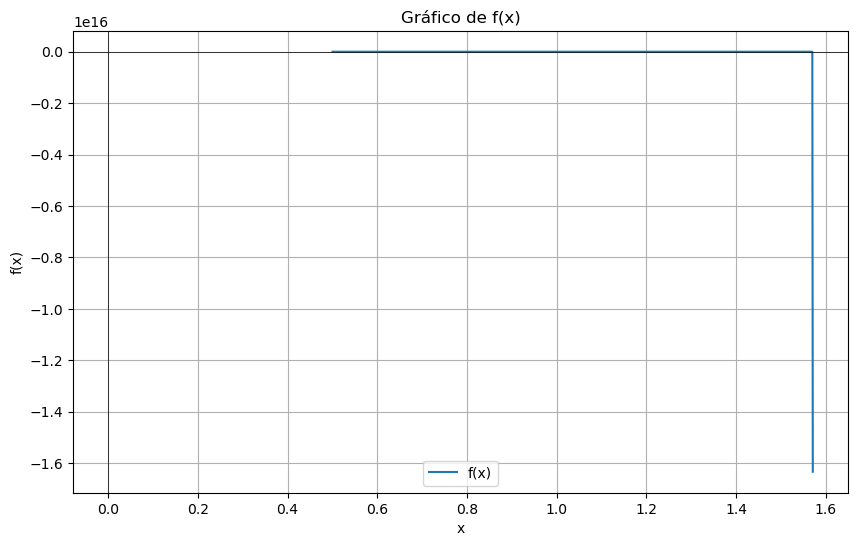

In [22]:
def f(x):
    return x - 1 - np.tan(x)

graficar(f, 0.5, np.pi / 2)

### punto 1- b

In [23]:
biseccion(f, 0.5, 1.5* np.pi/2, 10**-3, 3)

ite 1 : a_0 =0.5000000, b_0 =2.3561945, c_1 =1.4280972, e_abs=1.8561945
ite 2 : a_1 =1.4280972, b_1 =2.3561945, c_2 =1.8921459, e_abs=0.9280972
ite 3 : a_2 =1.4280972, b_2 =1.8921459, c_3 =1.6601216, e_abs=0.4640486
Solución no encontrada, iteraciones agotadas: 3


El método de bisección es fácil de implementar, garantiza la convergencia siempre que se cumplan ciertas condiciones como que la funcion cambie de signo en el intervalo elegido.
Otra característica es que este metodo tiene una corvengencia lenta en comparación con otros métodos por lo que podría requerir de más iteraciones para encontrar la raíz.

### punto 1 - c

In [10]:
secante(f, 0.5,1.5 * np.pi/2, 10**-3, 3)

ite 0 : p_0 =0.5000000
ite 1 : p_1 =2.3561945, e_abs=1.8561945
ite 2 : p_2 =1.0707987, e_abs=1.2853958
ite 3 : p_3 =1.6203537, e_abs=0.5495550
Solución no encontrada, iteraciones agotadas: 3


El metodo de la secante es un método iterativo que requiere de dos puntos iniciales, por lo que es sensible a la eleccion de estos ya que los mismos determinan la convergencia o velocidad de convergencia. Puntos iniciañes cercanos a la raiz suelen conducir a una convergencia rápida.

Este metodo no necesariamente garantiza una convergencia ya que la funcion puede diverger si la funcion tiene un comportamiento oscilante.

### punto 1 - e

In [11]:
regulafalsi(f, 0.5,1.5 * np.pi/2, 10**-3, 3)

ite 1 : a_0 =0.5000000 , b_0 =2.3561945, c_1 =1.0707987
ite 2 : a_1 =1.0707987 , b_1 =2.3561945, c_2 =1.6203537
ite 3 : a_2 =1.0707987 , b_2 =1.6203537, c_3 =1.1136984
Solución no encontrada, iteraciones agotadas: 3


En Regula falsi, el intervalo se selecciona de manera que la función cambien de signo en los extremos del intervalo. En cambio, en el metodo de la secante los puntos pueden elegirse arbitrariamente sin algún tipo de restricción.

En el método de regula falsi se usa una interpolación lineal para calcular las aproximaciones, lo que garantiza que la nueva aproximación esté más cerca de la raíz. En el método de la secante, la siguiente aproximación se calcula utilizando una secante entre dos puntos cercanos en la curva de la función.

Si bien ambos pueden converger a una solución, el método de la secante suele converger más rápido; especialmente en casos donde la función es suave y tiene derivadas continuas.

El método de la secante requiere dos puntos iniciales cercanos. En cambio, regula falsi requiere un intervalo inicial donde la función cambie de signo en los extremos del intervalo.

El método de la regla falsa garantiza la convergencia si la función es continua y cambia de signo en el intervalo inicial. En contraste, el método de la secante no garantiza la convergencia y puede divergir en ciertos casos, especialmente si los puntos iniciales están mal elegidos o si la función tiene comportamientos oscilantes cerca de la raíz.

### punto 2

In [12]:
# Definir la función f(x)
def f(x):
    return x**3 - x

# Definir la derivada de la función f(x)
def df(x):
    return 3*x**2 - 1

# Valor inicial
x_0 = np.sqrt(1/5)

# Ejecutar el algoritmo
newton_raphson(f, df, x_0)

ite 0 : p_0 =0.4472136
ite 1 : p_1 =-0.4472136, e_abs=0.8944272
ite 2 : p_2 =0.4472136, e_abs=0.8944272
ite 3 : p_3 =-0.4472136, e_abs=0.8944272
ite 4 : p_4 =0.4472136, e_abs=0.8944272
ite 5 : p_5 =-0.4472136, e_abs=0.8944272
ite 6 : p_6 =0.4472136, e_abs=0.8944272
ite 7 : p_7 =-0.4472136, e_abs=0.8944272
ite 8 : p_8 =0.4472136, e_abs=0.8944272
ite 9 : p_9 =-0.4472136, e_abs=0.8944272
ite 10: p_10=0.4472136, e_abs=0.8944272
ite 11: p_11=-0.4472136, e_abs=0.8944272
ite 12: p_12=0.4472136, e_abs=0.8944272
ite 13: p_13=-0.4472136, e_abs=0.8944272
ite 14: p_14=0.4472136, e_abs=0.8944272
ite 15: p_15=-0.4472136, e_abs=0.8944272
ite 16: p_16=0.4472136, e_abs=0.8944272
ite 17: p_17=-0.4472136, e_abs=0.8944272
ite 18: p_18=0.4472136, e_abs=0.8944272
ite 19: p_19=-0.4472136, e_abs=0.8944272
ite 20: p_20=0.4472136, e_abs=0.8944272
ite 21: p_21=-0.4472136, e_abs=0.8944272
ite 22: p_22=0.4472136, e_abs=0.8944272
ite 23: p_23=-0.4472136, e_abs=0.8944272
ite 24: p_24=0.4472136, e_abs=0.8944272
ite 2

El método no puede ceonverger a una solución debido a que Newton - Raphson es sencible a la elección del punto inicial

In [13]:
# Definir la función f(x)
def f(x):
    return x**3 - x

# Definir la derivada de la función f(x)
def df(x):
    return 3*x**2 - 1

# Valor inicial
x_0 = -2

# Ejecutar el algoritmo
newton_raphson(f, df, x_0)

ite 0 : p_0 =-2.0000000
ite 1 : p_1 =-1.4545455, e_abs=0.5454545
ite 2 : p_2 =-1.1510468, e_abs=0.3034987
ite 3 : p_3 =-1.0253259, e_abs=0.1257209
ite 4 : p_4 =-1.0009085, e_abs=0.0244175
ite 5 : p_5 =-1.0000012, e_abs=0.0009072
ite 6 : p_6 =-1.0000000, e_abs=0.0000012
Solución encotrada x=-1.0000000, iteraciones: 6


-1.000000000002289

In [14]:
def biseccion(f, a, b, Eps=1e-6, max_iter=100):
    iter = 1
    # Verificación de cambio de signo
    if f(a) * f(b) >= 0:
        print("Error: La función debe cambiar de signo en el intervalo [a, b].")
        return None
    # Calcular el primer punto medio
    p = (a + b) / 2
    # Iteraciones
    while iter <= max_iter and abs(f(p)) > Eps:
        iter += 1
        if f(a) * f(p) > 0:
            a = p
        else:
            b = p
        p = (a + b) / 2
    # Verificar convergencia
    if iter > max_iter:
        print(f"No converge en {max_iter} iteraciones.")
    else:
        print(f"Raíz aproximada = {p:.6f}")
    return p
# Definición de la función
def f(x):
    return x**3 - 4*x + 1
# Intervalo inicial
a = 1
b = 2
# Llamada al método de bisección
raiz = biseccion(f, a, b)
if raiz is not None:
    print(f"La raíz es aproximadamente {raiz:.6f}")

Raíz aproximada = 1.860806
La raíz es aproximadamente 1.860806
